[Guide To Reinforcement Learning](https://skymind.ai/wiki/deep-reinforcement-learning)

# Reinforcement learning (RL)
Reinforcement learning (RL) is the subfield of machine learning concerned with decision making and motor control. It studies how an agent can learn how to achieve goals in a complex, uncertain environment. It’s exciting for two reasons:

*   RL is very general, encompassing all problems that involve making a sequence of decisions: for example, controlling a robot’s motors so that it’s able to run and jump, making business decisions like pricing and inventory management, or playing video games and board games. RL can even be applied to supervised learning problems with sequential or structured outputs.
*   RL algorithms have started to achieve good results in many difficult environments. RL has a long history, but until recent advances in deep learning, it required lots of problem-specific engineering. DeepMind’s Atari results, BRETT from Pieter Abbeel’s group, and AlphaGo all used deep RL algorithms which did not make too many assumptions about their environment, and thus can be applied in other settings.


See: [Open AI GYM](https://gym.openai.com/)


RL is a general concept that can be simply described with an agent that takes actions in an environment in order to maximize its cumulative reward. The underlying idea is very lifelike, where similarly to the humans in real life, agents in RL algorithms are incentivized with punishments for bad actions and rewards for good ones.

## Markov Chain
![alt text](https://cdn-images-1.medium.com/max/1600/1*mPGk9WTNNvp3i4-9JFgD3w.png)

State–action–reward–state–action (SARSA) is an algorithm for learning a Markov decision process policy,

We start with an initial environment. It doesn’t have any associated reward yet, but it has a state (S_t).

Then for each iteration, an agent takes current state (S_t), picks best (based on model prediction) action (A_t) and executes it on an environment. Subsequently, environment returns a reward (R_t+1) for a given action, a new state (S_t+1) and an information if the new state is terminal. The process repeats until termination.

## Deep Q-Learning (DQN)

DQN is a RL technique that is aimed at choosing the best action for given circumstances (observation). Each possible action for each possible observation has its Q value, where ‘Q’ stands for a quality of a given move.

But how do we end up with accurate Q values? That’s where the deep neural networks and linear algebra come in.

For each state experienced by our agent, we are going to remember it

dqn_solver.remember(state, action, reward, state_next, terminal)

and perform an experience replay.

dqn_solver.experience_replay()

Experience replay is a biologically inspired process that uniformly (to reduce correlation between subsequent actions) samples experiences from the memory and for each entry updates its Q value.

We are calculating the new q by taking the maximum q for a given action (predicted value of a best next state), multiplying it by the discount factor (GAMMA) and ultimately adding it to the current state reward.

In other words, we are updating our Q value with the cumulative discounted future rewards.

Here is a formal notation:


![alt text](https://cdn-images-1.medium.com/max/1600/1*CLBIXdpk8ft0-1MFH8FwUg.png)
(source: https://en.wikipedia.org/wiki/Q-learning)

For those of you who wonder how such function can possibly converge, as it looks like it is trying to predict its own output (in some sense it is!), don’t worry - it’s possible and in our simple case it does.

However, convergence is not always that ‘easy’ and in more complex problems there comes a need of more advanced techniques that stabilize training. These techniques are for example Double DQN’s or Dueling DQN’s, but that’s a topic for another article (stay tuned).


Reinforcement Learning (DQN) tutorial
=====================================
Adapted from PyTorch website.

**Author**: `Adam Paszke <https://github.com/apaszke>`_


This tutorial shows how to use PyTorch to train a Deep Q Learning (DQN) agent
on the CartPole-v0 task from the `OpenAI Gym <https://gym.openai.com/>`__.

**Task**

The agent has to decide between two actions - moving the cart left or
right - so that the pole attached to it stays upright. You can find an
official leaderboard with various algorithms and visualizations at the
`Gym website <https://gym.openai.com/envs/CartPole-v0>`__.

As the agent observes the current state of the environment and chooses
an action, the environment *transitions* to a new state, and also
returns a reward that indicates the consequences of the action. In this
task, the environment terminates if the pole falls over too far.

The CartPole task is designed so that the inputs to the agent are 4 real
values representing the environment state (position, velocity, etc.).
However, neural networks can solve the task purely by looking at the
scene, so we'll use a patch of the screen centered on the cart as an
input. Because of this, our results aren't directly comparable to the
ones from the official leaderboard - our task is much harder.
Unfortunately this does slow down the training, because we have to
render all the frames.

Strictly speaking, we will present the state as the difference between
the current screen patch and the previous one. This will allow the agent
to take the velocity of the pole into account from one image.

**Packages**


First, let's import needed packages. Firstly, we need
`gym <https://gym.openai.com/docs>`__ for the environment
(Install using `pip install gym`).
We'll also use the following from PyTorch:

-  neural networks (``torch.nn``)
-  optimization (``torch.optim``)
-  automatic differentiation (``torch.autograd``)
-  utilities for vision tasks (``torchvision`` - `a separate
   package <https://github.com/pytorch/vision>`__).




##Cartpole Problem




![alt text](https://cdn-images-1.medium.com/max/1200/1*LnQ5sRu-tJmlvRWmDsdSvw.gif) ![alt text](https://cdn-images-1.medium.com/max/1200/1*jLj9SYWI7e6RElIsI3DFjg.gif)


Cartpole Problem
Cartpole - known also as an Inverted Pendulum is a pendulum with a center of gravity above its pivot point. It’s unstable, but can be controlled by moving the pivot point under the center of mass. The goal is to keep the cartpole balanced by applying appropriate forces to a pivot point.

![alt text](https://cdn-images-1.medium.com/max/1600/1*wRLArpx5VjWZWPeyf7H8Gw.png)

Violet square indicates a pivot point
Red and green arrows show possible horizontal forces that can be applied to a pivot point

*A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.*





Take a look at a video below with a real-life demonstration of a cartpole problem learning process.

[Real-life application of Reinforcement Learning
 video](https://youtu.be/XiigTGKZfks)



## Import
Before we start the tutorial, we need to install some dependencies to render and capture images from OpenAI Gym. It may take some time to set up the environment.

In [4]:
!apt-get install cmake zlib1g-dev libjpeg-dev xvfb libav-tools xorg-dev libboost-all-dev libsdl2-dev swig python3-dev python3-future python-opengl

!apt-get -qq -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1 > /dev/null
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null

!apt-get install xserver-xorg libglu1-mesa-dev mesa-common-dev libxmu-dev libxi-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package libav-tools is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  ffmpeg

E: Package 'libav-tools' has no installation candidate
E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libglu1-mesa-dev is already the newest version (9.0.0-2.1build1).
libglu1-mesa-dev set to manually installed.
libxi-dev is already the newest version (2:1.7.9-1).
libxi-dev set to manually installed.
libxmu-dev is already th

In [5]:
!pip3 install torch torchvision gym[all] PyOpenGL piglet pyglet pyvirtualdisplay

     |████████████████████████████████| 61kB 2.4MB/s 
     |████████████████████████████████| 778kB 8.2MB/s 
     |████████████████████████████████| 450kB 46.6MB/s 
     |████████████████████████████████| 92kB 31.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/c7/59/a5/5bd1a35a4a4596714c4c7925a1751e7b1580b6ced363fd7969
  Stored in directory: /root/.cache/pip/wheels/d1/8c/16/1c64227974ae29c687e4cc30fd691d5c0fd40f54446dde99da
  ERROR: Failed building wheel for mujoco-py
  Running setup.py clean for mujoco-py
  Stored in directory: /root/.cache/pip/wheels/41/22/19/af15ef6264c58b625a82641ed7483ad05e258fbd8925505227
  Stored in directory: /root/.cache/pip/wheels/d9/cf/69/c19646d6ae4742b04a9004bd274dac036a8d23747af99c672d
Successfully built piglet pyvirtualdisplay EasyProcess glfw
Failed to build mujoco-py
  Running setup.py install for mujoco-py ... error
ERROR: Command "/usr/bin/python3 -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-0_1an89a/mujoco-py/setup.py'"'"'

In [0]:
# Start virtual display
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)


In [0]:
%matplotlib inline

In [0]:
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation

from collections import namedtuple
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

from IPython.display import HTML


env = gym.make('CartPole-v0').unwrapped

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Replay Memory
-------------

We'll be using experience replay memory for training our DQN. It stores
the transitions that the agent observes, allowing us to reuse this data
later. By sampling from it randomly, the transitions that build up a
batch are decorrelated. It has been shown that this greatly stabilizes
and improves the DQN training procedure.

For this, we're going to need two classses:

-  ``Transition`` - a named tuple representing a single transition in
   our environment
-  ``ReplayMemory`` - a cyclic buffer of bounded size that holds the
   transitions observed recently. It also implements a ``.sample()``
   method for selecting a random batch of transitions for training.




In [0]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, *args):
        """Saves a transition."""
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = Transition(*args)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

Now, let's define our model. But first, let quickly recap what a DQN is.

DQN algorithm
-------------

Our environment is deterministic, so all equations presented here are
also formulated deterministically for the sake of simplicity. In the
reinforcement learning literature, they would also contain expectations
over stochastic transitions in the environment.

Our aim will be to train a policy that tries to maximize the discounted,
cumulative reward
$R_{t_0} = \sum_{t=t_0}^{\infty} \gamma^{t - t_0} r_t$, where
$R_{t_0}$ is also known as the *return*. The discount,
$\gamma$, should be a constant between $0$ and $1$
that ensures the sum converges. It makes rewards from the uncertain far
future less important for our agent than the ones in the near future
that it can be fairly confident about.

The main idea behind Q-learning is that if we had a function
$Q^*: State \times Action \rightarrow \mathbb{R}$, that could tell
us what our return would be, if we were to take an action in a given
state, then we could easily construct a policy that maximizes our
rewards:

\begin{align}\pi^*(s) = \arg\!\max_a \ Q^*(s, a)\end{align}

However, we don't know everything about the world, so we don't have
access to $Q^*$. But, since neural networks are universal function
approximators, we can simply create one and train it to resemble
$Q^*$.

For our training update rule, we'll use a fact that every $Q$
function for some policy obeys the Bellman equation:

\begin{align}Q^{\pi}(s, a) = r + \gamma Q^{\pi}(s', \pi(s'))\end{align}

The difference between the two sides of the equality is known as the
temporal difference error, $\delta$:

\begin{align}\delta = Q(s, a) - (r + \gamma \max_a Q(s', a))\end{align}

To minimise this error, we will use the `Huber
loss <https://en.wikipedia.org/wiki/Huber_loss>`__. The Huber loss acts
like the mean squared error when the error is small, but like the mean
absolute error when the error is large - this makes it more robust to
outliers when the estimates of $Q$ are very noisy. We calculate
this over a batch of transitions, $B$, sampled from the replay
memory:

\begin{align}\mathcal{L} = \frac{1}{|B|}\sum_{(s, a, s', r) \ \in \ B} \mathcal{L}(\delta)\end{align}

\begin{align}\text{where} \quad \mathcal{L}(\delta) = \begin{cases}
     \frac{1}{2}{\delta^2}  & \text{for } |\delta| \le 1, \\
     |\delta| - \frac{1}{2} & \text{otherwise.}
   \end{cases}\end{align}

### Q-network

Our model will be a convolutional neural network that takes in the
difference between the current and previous screen patches. It has two
outputs, representing $Q(s, \mathrm{left})$ and
$Q(s, \mathrm{right})$ (where $s$ is the input to the
network). In effect, the network is trying to predict the *quality* of
taking each action given the current input.




In [0]:
class DQN(nn.Module):

    def __init__(self):
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=5, stride=2)
        self.bn3 = nn.BatchNorm2d(32)
        self.head = nn.Linear(448, 2)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        return self.head(x.view(x.size(0), -1))

### Input extraction


The code below are utilities for extracting and processing rendered
images from the environment. It uses the ``torchvision`` package, which
makes it easy to compose image transforms. Once you run the cell it will
display an example patch that it extracted.




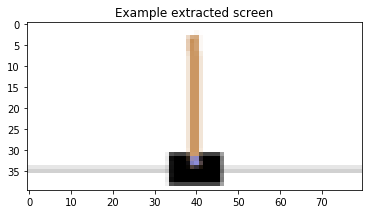

In [16]:
resize = T.Compose([T.ToPILImage(),
                    T.Resize(40, interpolation=Image.CUBIC),
                    T.ToTensor()])

# This is based on the code from gym.
screen_width = 600


def get_cart_location():
    world_width = env.x_threshold * 2
    scale = screen_width / world_width
    return int(env.state[0] * scale + screen_width / 2.0)  # MIDDLE OF CART


def get_screen():
    screen = env.render(mode='rgb_array').transpose(
        (2, 0, 1))  # transpose into torch order (CHW)
    # Strip off the top and bottom of the screen
    screen = screen[:, 160:320]
    view_width = 320
    cart_location = get_cart_location()
    if cart_location < view_width // 2:
        slice_range = slice(view_width)
    elif cart_location > (screen_width - view_width // 2):
        slice_range = slice(-view_width, None)
    else:
        slice_range = slice(cart_location - view_width // 2,
                            cart_location + view_width // 2)
    # Strip off the edges, so that we have a square image centered on a cart
    screen = screen[:, :, slice_range]
    # Convert to float, rescare, convert to torch tensor
    # (this doesn't require a copy)
    screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
    screen = torch.from_numpy(screen)
    # Resize, and add a batch dimension (BCHW)
    return resize(screen).unsqueeze(0).to(device)


env.reset()

plt.figure()
plt.imshow(get_screen().cpu().squeeze(0).permute(1, 2, 0).numpy(),
           interpolation='none')
plt.title('Example extracted screen')
plt.show()


Training
--------





### Hyperparameters and utilities

This cell instantiates our model and its optimizer, and defines some
utilities:

-  ``select_action`` - will select an action accordingly to an epsilon
   greedy policy. Simply put, we'll sometimes use our model for choosing
   the action, and sometimes we'll just sample one uniformly. The
   probability of choosing a random action will start at ``EPS_START``
   and will decay exponentially towards ``EPS_END``. ``EPS_DECAY``
   controls the rate of the decay.
-  ``plot_durations`` - a helper for plotting the durations of episodes,
   along with an average over the last 100 episodes (the measure used in
   the official evaluations). The plot will be underneath the cell
   containing the main training loop, and will update after every
   episode.


In [0]:
BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
TARGET_UPDATE = 10

policy_net = DQN().to(device)
target_net = DQN().to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.RMSprop(policy_net.parameters())
memory = ReplayMemory(10000)


steps_done = 0


def select_action(state):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    if sample > eps_threshold:
        with torch.no_grad():
            return policy_net(state).max(1)[1].view(1, 1)
    else:
        return torch.tensor([[random.randrange(2)]], device=device, dtype=torch.long)


episode_durations = []


def plot_durations():
    plt.figure(2)
    plt.clf()
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        display.clear_output(wait=True)
        display.display(plt.gcf())

### Training loop


Finally, the code for training our model.

Here, you can find an ``optimize_model`` function that performs a
single step of the optimization. It first samples a batch, concatenates
all the tensors into a single one, computes $Q(s_t, a_t)$ and
$V(s_{t+1}) = \max_a Q(s_{t+1}, a)$, and combines them into our
loss. By defition we set $V(s) = 0$ if $s$ is a terminal
state. We also use a target network to compute $V(s_{t+1})$ for
added stability. The target network has its weights kept frozen most of
the time, but is updated with the policy network's weights every so often.
This is usually a set number of steps but we shall use episodes for
simplicity.




In [0]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see http://stackoverflow.com/a/19343/3343043 for
    # detailed explanation).
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.uint8)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    loss = F.smooth_l1_loss(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()

Below, you can find the main training loop. At the beginning we reset
the environment and initialize the ``state`` Tensor. Then, we sample
an action, execute it, observe the next screen and the reward (always
1), and optimize our model once. When the episode ends (our model
fails), we restart the loop.

Below, `num_episodes` is set small. You should download
the notebook and run lot more epsiodes.




In [19]:
num_episodes = 50
for i_episode in range(num_episodes):
    # Initialize the environment and state
    env.reset()
    last_screen = get_screen()
    current_screen = get_screen()
    state = current_screen - last_screen
    for t in count():
        # Select and perform an action
        action = select_action(state)
        _, reward, done, _ = env.step(action.item())
        reward = torch.tensor([reward], device=device)

        # Observe new state
        last_screen = current_screen
        current_screen = get_screen()
        if not done:
            next_state = current_screen - last_screen
        else:
            next_state = None

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the target network)
        optimize_model()
        if done:
            episode_durations.append(t + 1)
            plot_durations()
            break
    # Update the target network
    if i_episode % TARGET_UPDATE == 0:
        target_net.load_state_dict(policy_net.state_dict())

print('Complete')
env.render()
plt.show()

<Figure size 432x288 with 0 Axes>

Complete


<Figure size 432x288 with 0 Axes>

test episode: 0 R: 9.0
test episode: 1 R: 10.0
test episode: 2 R: 9.0


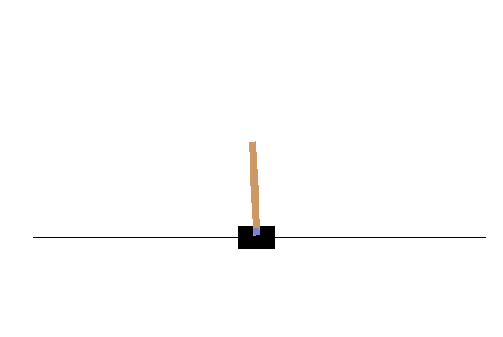

In [20]:
frames = []
for i in range(3):
    env.reset()
    last_screen = get_screen()
    current_screen = get_screen()
    state = current_screen - last_screen
    done = False
    R = 0
    t = 0
    while not done and t < 200:
        frames.append(env.render(mode = 'rgb_array'))
        action = select_action(state)
        obs, r, done, _ = env.step(action.item())
        R += r
        t += 1
        if not done:
            next_state = current_screen - last_screen
        else:
            next_state = None
        state = next_state
    print('test episode:', i, 'R:', R)
env.render()


# make a video to display
plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())

# Deep Neural Net


A neural net architecture:


```
self.model = Sequential()
self.model.add(Dense(24, input_shape=(observation_space,), activation="relu"))
self.model.add(Dense(24, activation="relu"))
self.model.add(Dense(self.action_space, activation="linear"))
self.model.compile(loss="mse", optimizer=Adam(lr=0.001))
```


Its size is suited for the project’s modest complexity, but feel free to play with its structure and parameters.

![alt text](https://cdn-images-1.medium.com/max/2400/1*YTvSSoN0nFa1cgd9iKRMCA.png)

Trial overview example


![alt text](https://cdn-images-1.medium.com/max/1600/1*NUIp86mQUOJ7qCR5UrU1ow.png)

Solved trials overview
